In [7]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks
import matplotlib.pyplot as plt

x = torch.rand(3)

print(x)

tensor([0.3904, 0.6009, 0.2566])


In [8]:
#Check PyTorch Version
torch.__version__

#Create *known* parameters
weight = 0.7
bias = 0.3

#Want to build a model that estimates these numbers
start = 0
end = 1
step = 0.02

In [9]:
#Typically x is a matrix or tensor
#Capital represent matrix or tensor
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

train_split = int(0.8 * len(X)) #80% of training set and 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

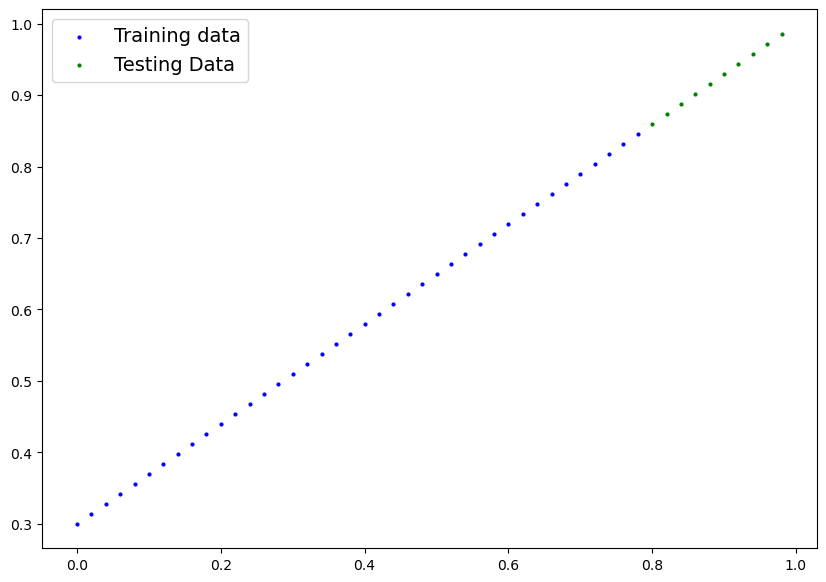

In [13]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  #PLot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot the test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    #Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size": 14})

plot_predictions();

In [11]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, 
                                          dtype=torch.float),
                              requires_grad=True)
    
    self.bias = nn.Parameter(torch.randn(1,
                                        dtype=torch.float),
                            requires_grad=True)
    
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [12]:
#Set the manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

model_0 = LinearRegressionModel()

#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)